# DATA ANALYSIS NOTEBOOK
Felix A. Westphal
DLMDWME01

### Import

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Parameter

In [77]:
FILE_PATH_INPUT_DATA = r"../data/processed/Cleaned_Input_Data.csv"

### Load Data

In [78]:
input_data = pd.read_csv(FILE_PATH_INPUT_DATA)                        # Load input data file
print(input_data)

                      tmsp      country  amount  success         PSP  \
0      2019-01-01 00:01:11      Germany    89.0    False     UK_Card   
1      2019-01-01 00:01:17      Germany    89.0     True     UK_Card   
2      2019-01-01 00:02:49      Germany   238.0    False     UK_Card   
3      2019-01-01 00:03:13      Germany   238.0     True     UK_Card   
4      2019-01-01 00:04:33      Austria   124.0    False  Simplecard   
...                    ...          ...     ...      ...         ...   
50405  2019-02-28 23:45:39  Switzerland   415.0    False     UK_Card   
50406  2019-02-28 23:46:48      Austria    91.0    False     UK_Card   
50407  2019-02-28 23:47:04      Austria    91.0    False     UK_Card   
50408  2019-02-28 23:47:36      Austria    91.0    False     UK_Card   
50409  2019-02-28 23:48:19      Austria    91.0     True   Moneycard   

       3D_secured    card  
0           False    Visa  
1           False    Visa  
2            True  Diners  
3            True  Dine

### Statistical Analysis of Input Data

In [84]:
def get_statistics(column_header, num_round=3):
    min = np.round(np.min(input_data[column_header]), num_round)
    max = np.round(np.max(input_data[column_header]), num_round)
    mean = np.round(np.mean(input_data[column_header]), num_round)
    std = np.round(np.std(input_data[column_header]), num_round)
    return min, max, mean, std
amount_min, amount_max, amount_mean, amount_std = get_statistics("amount", num_round=2)

num_entries = len(input_data.index)
num_success = len(input_data[input_data["success"] == True].index)
num_secured = len(input_data[input_data["3D_secured"] == True].index)
rel_success = np.round((num_success/num_entries) * 100, 2)
rel_secured = np.round((num_secured/num_entries) * 100, 2)

num_psp_moneycard = len(input_data[input_data["PSP"] == "Moneycard"].index)
num_psp_goldcard = len(input_data[input_data["PSP"] == "Goldcard"].index)
num_psp_ukcard = len(input_data[input_data["PSP"] == "UK_Card"].index)
num_psp_simplecard = len(input_data[input_data["PSP"] == "Simplecard"].index)

num_card_master = len(input_data[input_data["card"] == "Master"].index)
num_card_visa = len(input_data[input_data["card"] == "Visa"].index)
num_card_diners = len(input_data[input_data["card"] == "Diners"].index)

print(f"========== STATISTICS OF INPUT DATA ==========")
print(f"Number of transactions: {num_entries}")
print(f"Number of successful transactions: {num_success} / {rel_success}%")
print(f"Number of 3D secured transactions: {num_secured} / {rel_secured}%")
print(f"Amount Min, Max, Mean, Std: {amount_min}€, {amount_max}€, {amount_mean}€, {amount_std}€")

========== STATISTICS OF INPUT DATA ==========
Number of transactions: 50410
Number of successful transactions: 10228 / 20.29%
Number of 3D secured transactions: 12011 / 23.83%
Amount Min, Max, Mean, Std: 6.0€, 630.0€, 202.4€, 96.27€


#### Histograms

========== HISTOGRAMS OF INPUT DATA ==========


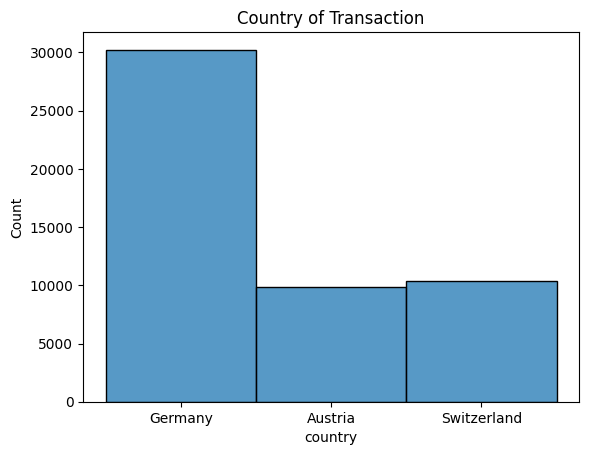

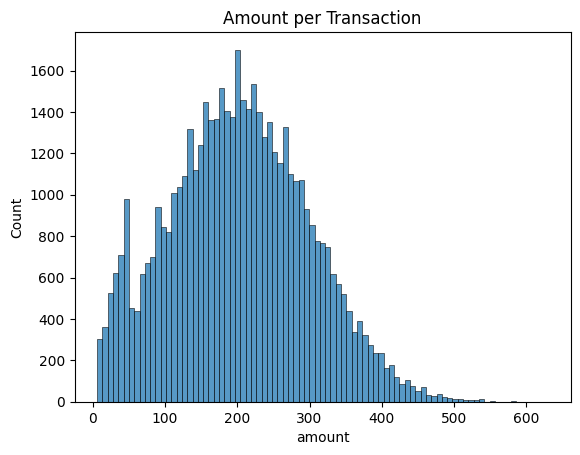

In [89]:
print(f"========== HISTOGRAMS OF INPUT DATA ==========")
plt.title("Country of Transaction")
sns.histplot(data=input_data, x="country")
plt.show()

plt.title("Amount per Transaction")
sns.histplot(data=input_data, x="amount")
plt.show()

#### Pie Charts

========== PIE CHARTS OF INPUT DATA ==========


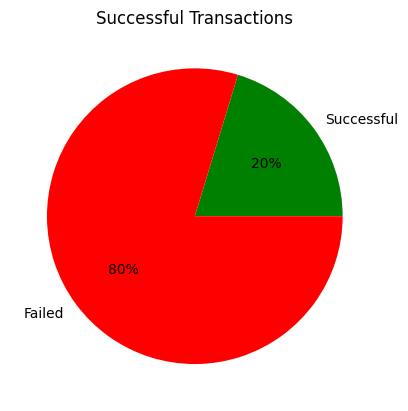

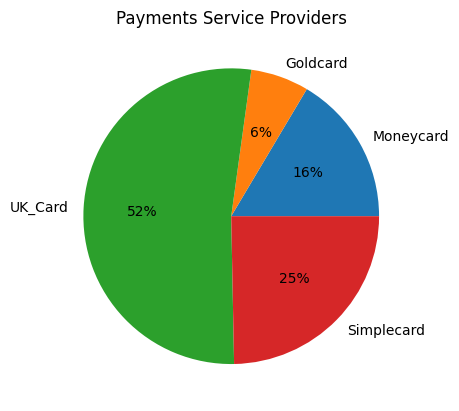

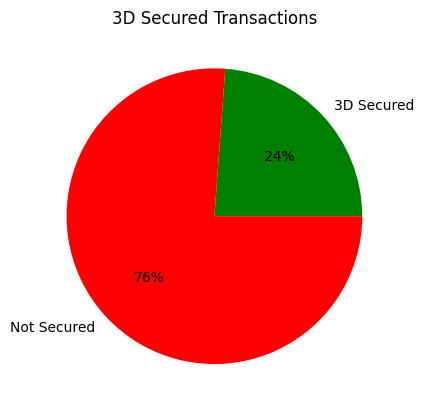

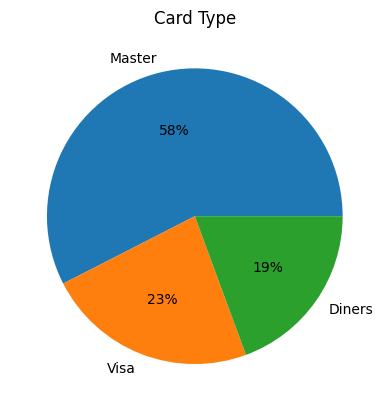

In [90]:
print(f"========== PIE CHARTS OF INPUT DATA ==========")
plt.title("Successful Transactions")
plt.pie([num_success, num_entries - num_success], labels=["Successful", "Failed"], colors=["green", "red"], autopct='%.0f%%')
plt.show()

plt.title("Payments Service Providers")
plt.pie([num_psp_moneycard, num_psp_goldcard, num_psp_ukcard, num_psp_simplecard], labels=["Moneycard", "Goldcard", "UK_Card", "Simplecard"], autopct='%.0f%%')
plt.show()

plt.title("3D Secured Transactions")
plt.pie([num_secured, num_entries - num_secured], labels=["3D Secured", "Not Secured"], colors=["green", "red"], autopct='%.0f%%')
plt.show()

plt.title("Card Type")
plt.pie([num_card_master, num_card_visa, num_card_diners], labels=["Master", "Visa", "Diners"], autopct='%.0f%%')
plt.show()